# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis
1. The average temperatures for the city list is 65 degrees with the minimum of 21 and the max at 101 degrees. There were no cities with greater than 100% humidity.
2. The cloudiness is relatively consistent across the various latitudes in the plot graph.
3. The positive correlation and high r value in the southern hemisphere and max temperature regression model matches the data and as we get closer to the equator temperatures rise.
4. The Northern Hemisphere humidity and latitude linear regression provided a very low r value which may confirm there is no relationship between the variables.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import random
import json
import time
from pprint import pprint
from scipy.stats import linregress

#installed pip install citipy on terminal
from citipy import citipy

output_data_file = pd.read_csv(os.path.join("..", "output_data", "cities.csv"))

# Import API key
from api_keys import g_key
from api_keys import weather_api_key

## Generate Cities List

643

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []

cities = []

# Create a set of random lat and lng combinations for a random 500 cities (no repeats)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

citiesfinal = cities[:500] #grab the first 500 unique cities in the list
len(citiesfinal)

500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#second URL complete
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_name = []
clouds = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through all cities in cities list.
for city in cities:
    
    # Try statement to append calls where values are found.
    try:
        print(f'Processing Record {record} | {city}')
        
        response = requests.get(f'{base_url}&q={city}').json()
        city_name.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
         
        # Increase record counter.
        record += 1
        
        # Do not exceed API call limit.
        time.sleep(1.01)
        
    # If no record found for city, then skip. #add error types
    except:
        print('City not found. Skip...')
    #continue
   #break


Beginning Data Retrieval
-------------------------
Processing Record 1 | arraial do cabo
Processing Record 2 | sao filipe
Processing Record 3 | pilot butte
Processing Record 4 | yellowknife
Processing Record 5 | jamestown
Processing Record 6 | salamanca
Processing Record 7 | ilulissat
Processing Record 8 | puerto ayora
Processing Record 9 | olinda
Processing Record 10 | barrow
Processing Record 11 | tuktoyaktuk
Processing Record 12 | busselton
Processing Record 13 | segezha
Processing Record 14 | nizhneyansk
City not found. Skip...
Processing Record 14 | road town
Processing Record 15 | butaritari
Processing Record 16 | leh
Processing Record 17 | punta arenas
Processing Record 18 | mataura
Processing Record 19 | tocopilla
Processing Record 20 | flinders
Processing Record 21 | jabinyanah
Processing Record 22 | ambilobe
Processing Record 23 | qaanaaq
Processing Record 24 | grindavik
Processing Record 25 | shar
Processing Record 26 | kununurra
Processing Record 27 | pangnirtung
Processing

Processing Record 217 | ponta do sol
Processing Record 218 | arrifes
Processing Record 219 | puli
Processing Record 220 | ancud
Processing Record 221 | lompoc
Processing Record 222 | marcona
City not found. Skip...
Processing Record 222 | gilbues
Processing Record 223 | nyimba
Processing Record 224 | lebyazhye
Processing Record 225 | kargasok
Processing Record 226 | benguela
Processing Record 227 | asau
Processing Record 228 | kirakira
Processing Record 229 | vagay
Processing Record 230 | ostrovnoy
Processing Record 231 | grand river south east
City not found. Skip...
Processing Record 231 | ngama
Processing Record 232 | chapais
Processing Record 233 | oksfjord
Processing Record 234 | te anau
Processing Record 235 | umzimvubu
City not found. Skip...
Processing Record 235 | los llanos de aridane
Processing Record 236 | sentyabrskiy
City not found. Skip...
Processing Record 236 | guanica
Processing Record 237 | tasiilaq
Processing Record 238 | la plaine
Processing Record 239 | tabiauea
C

Processing Record 427 | mirabad
Processing Record 428 | raseiniai
Processing Record 429 | sydney mines
Processing Record 430 | cotonou
Processing Record 431 | coffs harbour
Processing Record 432 | aquiraz
Processing Record 433 | panguna
Processing Record 434 | ngawi
Processing Record 435 | kayes
Processing Record 436 | akcaabat
Processing Record 437 | olafsvik
Processing Record 438 | chalinze
Processing Record 439 | stornoway
Processing Record 440 | datong
Processing Record 441 | beringovskiy
Processing Record 442 | khormuj
City not found. Skip...
Processing Record 442 | poronaysk
Processing Record 443 | saint anthony
Processing Record 444 | jabiru
City not found. Skip...
Processing Record 444 | darnah
Processing Record 445 | dudinka
Processing Record 446 | bonthe
Processing Record 447 | marawi
Processing Record 448 | coihaique
Processing Record 449 | mathbaria
Processing Record 450 | halalo
City not found. Skip...
Processing Record 450 | vanavara
Processing Record 451 | batagay-alyta


In [4]:
#tested the various output to ensure correctly exporting
city_name
clouds
country
date 
humidity
lats
lngs
max_temps
wind_speeds

[9.17,
 6.35,
 17.22,
 10.29,
 5.82,
 3.24,
 16.11,
 5.99,
 11.41,
 27.51,
 9.17,
 10.96,
 5.39,
 6.93,
 16.82,
 4.07,
 5.82,
 11.99,
 11.16,
 7,
 6.93,
 6.11,
 6.08,
 11.41,
 16.08,
 6.93,
 10.29,
 11.01,
 12.75,
 13.87,
 11.77,
 9.17,
 6.76,
 2.24,
 2.71,
 7.63,
 12.75,
 4.25,
 1.99,
 5.01,
 5.68,
 9.17,
 32.21,
 8.46,
 1.81,
 2.24,
 8.95,
 10.63,
 2.24,
 7.72,
 14.34,
 12.75,
 11.41,
 3.36,
 11.41,
 6.93,
 10.8,
 8.95,
 5.82,
 11.7,
 11.1,
 13.87,
 3.36,
 2.93,
 2.44,
 9.22,
 16.11,
 2.62,
 3.36,
 17.43,
 23.04,
 10.29,
 16.93,
 5.99,
 6.93,
 18.34,
 17.9,
 1.05,
 10.71,
 10.29,
 14.47,
 17.29,
 2.64,
 4.7,
 0.38,
 11.41,
 10,
 3.47,
 5.82,
 6.93,
 3.36,
 1.99,
 7.9,
 8.05,
 2.44,
 1.43,
 4.7,
 11.41,
 3.36,
 12.75,
 0.36,
 12.75,
 3.56,
 5.82,
 8.05,
 18.88,
 3.94,
 6.26,
 7.99,
 3,
 3.27,
 8.08,
 4.7,
 0.22,
 4.43,
 10.29,
 20.02,
 6.93,
 3.36,
 10.31,
 10.56,
 7.67,
 6.93,
 14.99,
 8.7,
 11.05,
 2.95,
 12.77,
 22.75,
 6.6,
 15.66,
 6.93,
 6.02,
 4.9,
 3.71,
 8.68,
 1.63,
 1.99,
 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [5]:
# Create values dictionary from API call lists.
weatherdata = {
    'City':city_name,
    'Lat': lats,
    'Lng': lngs,
    'Max Temp': max_temps,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': wind_speeds,
    'Country': country,
    'Date': date,
    }

# Create new DF for values in dictionary.
df_weather = pd.DataFrame(weatherdata)

# Display count of weather values per column.
df_weather.count()

# Save csv file.
df_weather.to_csv('weather_data.csv')

df_weather.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.97,-42.03,71.60,88,75,9.17,BR,1600212772
1,São Filipe,14.90,-24.50,79.86,82,68,6.35,CV,1600212895
2,Pilot Butte,50.47,-104.42,59.00,58,90,17.22,CA,1600212896
3,Yellowknife,62.46,-114.35,37.99,29,20,10.29,CA,1600212898
4,Jamestown,42.10,-79.24,60.01,67,1,5.82,US,1600212861
5,Salamanca,40.83,-6.00,60.01,87,67,3.24,ES,1600212900
6,Ilulissat,69.22,-51.10,42.80,70,100,16.11,GL,1600212902
7,Puerto Ayora,-0.74,-90.35,68.00,89,72,5.99,EC,1600212903
8,Olinda,-8.01,-34.86,78.80,74,40,11.41,BR,1600212905
9,Barrow,71.29,-156.79,35.60,86,90,27.51,US,1600212906


In [6]:
#summary of information with numerical values
df_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.00000,5.680000e+02
mean,21.236989,20.705088,65.256761,72.892606,54.783451,7.98662,1.600213e+09
std,33.221015,90.156155,14.780604,19.804799,36.978004,5.44511,2.264627e+02
min,-54.800000,-179.170000,19.580000,1.000000,0.000000,0.07000,1.600213e+09
25%,-6.145000,-59.305000,52.000000,63.000000,20.000000,3.36000,1.600213e+09
50%,26.590000,26.545000,67.740000,78.000000,65.000000,6.93000,1.600213e+09
75%,49.227500,97.482500,77.095000,87.000000,90.000000,11.39500,1.600213e+09
max,78.220000,179.320000,100.850000,100.000000,100.000000,33.33000,1.600214e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#display records from data frame with humidity is less than 100 only
humid100 = df_weather[df_weather['Humidity']<=100]

humid100.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.97,-42.03,71.60,88,75,9.17,BR,1600212772
1,São Filipe,14.90,-24.50,79.86,82,68,6.35,CV,1600212895
2,Pilot Butte,50.47,-104.42,59.00,58,90,17.22,CA,1600212896
3,Yellowknife,62.46,-114.35,37.99,29,20,10.29,CA,1600212898
4,Jamestown,42.10,-79.24,60.01,67,1,5.82,US,1600212861
5,Salamanca,40.83,-6.00,60.01,87,67,3.24,ES,1600212900
6,Ilulissat,69.22,-51.10,42.80,70,100,16.11,GL,1600212902
7,Puerto Ayora,-0.74,-90.35,68.00,89,72,5.99,EC,1600212903
8,Olinda,-8.01,-34.86,78.80,74,40,11.41,BR,1600212905
9,Barrow,71.29,-156.79,35.60,86,90,27.51,US,1600212906


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
#max temp from summary did not identify cities otherwise would have index #s for the respective city
humid_index = df_weather[df_weather['Humidity']>100].index
humid_index

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" (this is default) will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index using previous dataframe
clean_city_data = df_weather.drop(humid_index)
clean_city_data                                             
                                             

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.97,-42.03,71.60,88,75,9.17,BR,1600212772
1,São Filipe,14.90,-24.50,79.86,82,68,6.35,CV,1600212895
2,Pilot Butte,50.47,-104.42,59.00,58,90,17.22,CA,1600212896
3,Yellowknife,62.46,-114.35,37.99,29,20,10.29,CA,1600212898
4,Jamestown,42.10,-79.24,60.01,67,1,5.82,US,1600212861
...,...,...,...,...,...,...,...,...,...
563,Angoche,-16.23,39.91,71.83,88,0,9.75,MZ,1600213639
564,Aksarka,66.56,67.80,45.66,92,97,6.38,RU,1600213640
565,Sabaudia,41.30,13.03,73.00,65,93,3.09,IT,1600213641
566,Ialibu,-6.28,143.99,64.69,86,85,3.62,PG,1600213643


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

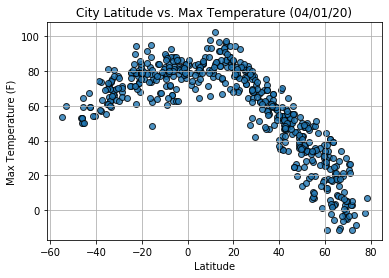

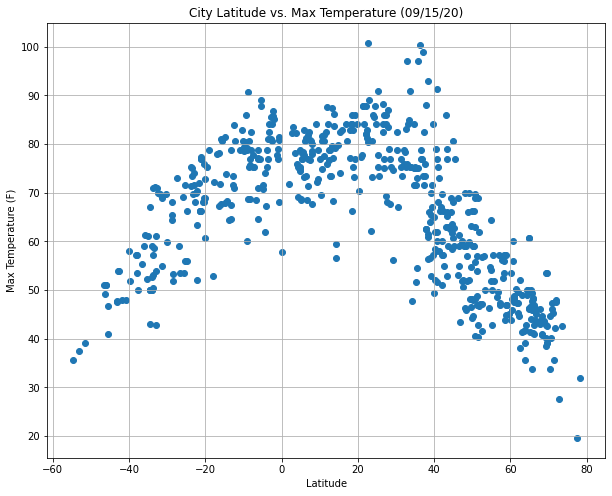

In [10]:
# Establishes size for the next visualization/graph Latitude vs. Temperature Plot
plt.figure(figsize=(10,8))

# Establishes type, data, and configuration for visualization/graph
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], linewidths=1, marker="o")

# Creates labels and grid for graph
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Exports graph as a png image file (steps are repeated for the rest of the script...)
plt.savefig("Fig1Lat&TempPlot.png")

## Latitude vs. Humidity Plot

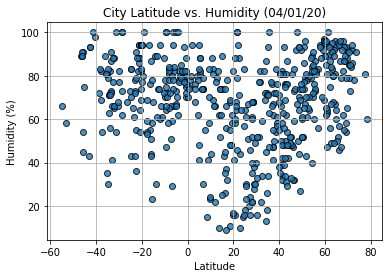

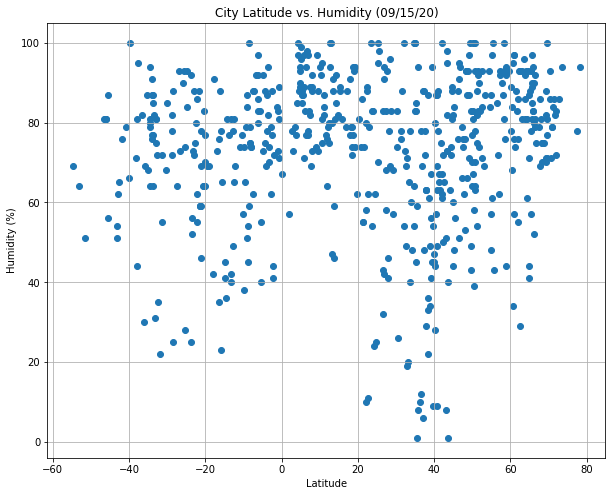

In [11]:
# Establishes  next visualization/graph Latitude vs. Humidity Plot
plt.figure(figsize=(10,8))

plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], linewidths=1, marker="o")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Fig2Lat&HumidityPlot.png")

## Latitude vs. Cloudiness Plot

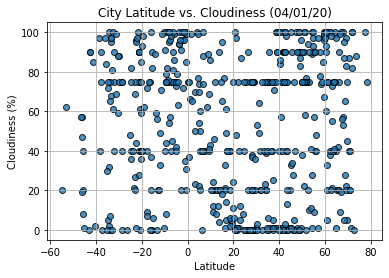

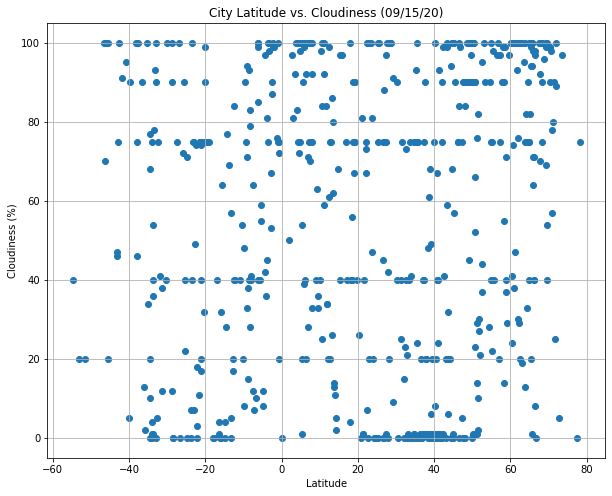

In [12]:
# Establishes  next visualization/graph Latitude vs. Cloudiness Plot
plt.figure(figsize=(10,8))

plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], linewidths=1, marker="o")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Fig3Lat&Cloudiness.png")

## Latitude vs. Wind Speed Plot

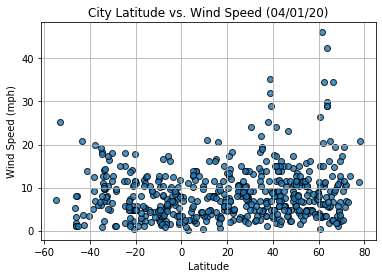

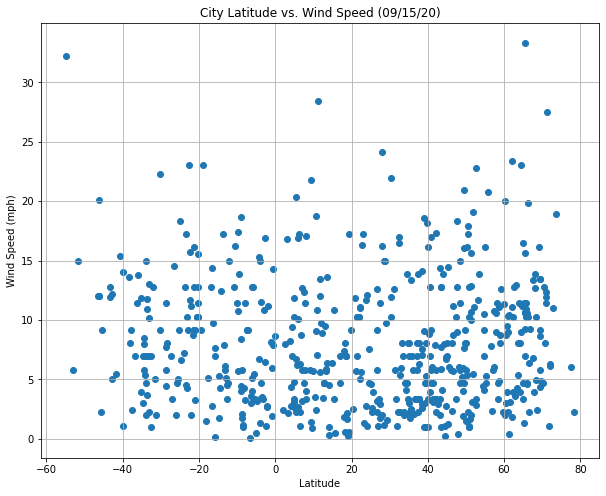

In [13]:
# Establishes  next visualization/graph Latitude vs. Wind Speed
plt.figure(figsize=(10,8))

plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], linewidths=1, marker="o")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Fig4Lat&WindSpeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


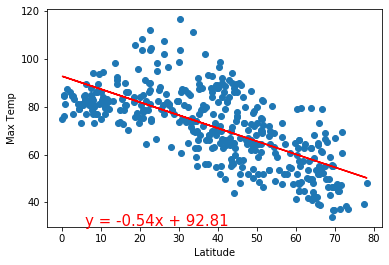

The line of best fit: y = -0.62x + 88.88
The r-value is: -0.8001951007383008


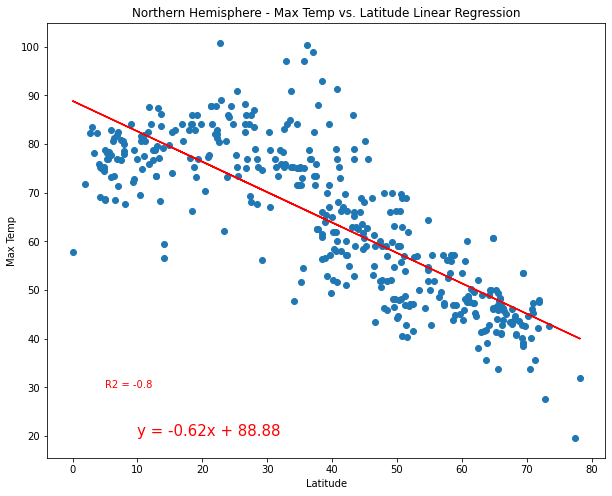

In [16]:
#Linear Regression -Northern Hemisphere - Max Temp vs. Latitude 
#establish source of information for nouthern hemisphere and from that extract specific columns for x and y values
north_df = clean_city_data[clean_city_data['Lat']>=0]
x_valuesnorth = north_df['Lat']
y_values = north_df['Max Temp']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuesnorth, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values1 = x_valuesnorth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq1}")

#establish figure size
plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuesnorth, y_values)

# Plot the regression line
plt.plot(x_valuesnorth, regression_values1, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")


# Add the linear equation to the plot
plt.annotate(line_eq1, (10, 20), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (5, 30), fontsize=10, color="red")

#save figure to file with new title
plt.savefig("Fig5NorthHemi&MaxTemp.png")

#display graph at the end
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


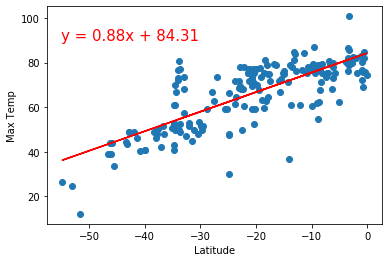

The line of best fit: y = 0.74x + 83.01
The r-value is: 0.8257307150941847


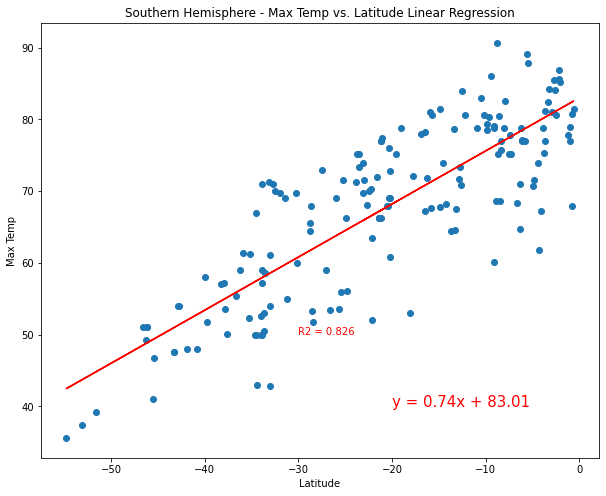

In [17]:
#Linear Regression -Southern Hemisphere - Max Temp vs. Latitude 
#establish source of information for southern hemisphere and from that extract specific columns for x and y values

south_df = clean_city_data[clean_city_data['Lat']<=0]
x_valuessouth = south_df['Lat']
y_values = south_df['Max Temp']


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuessouth, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values2 = x_valuessouth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq2}")

#establish figure size
plt.figure(figsize=(10,8))

# Plot observations
plt.scatter(x_valuessouth, y_values)

# Plot the regression line
plt.plot(x_valuessouth, regression_values2, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")

# Add the linear equation to the plot
plt.annotate(line_eq2, (-20, 40), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (-30, 50), fontsize=10, color="red")

#save figure
plt.savefig("Fig6SouthHemi&MaxTemp.png")

#display plot at the end
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


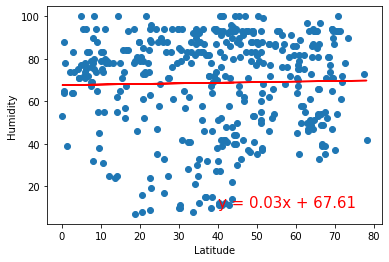

The line of best fit: y = 0.0x + 73.81
The r-value is: 0.0016745984230347583


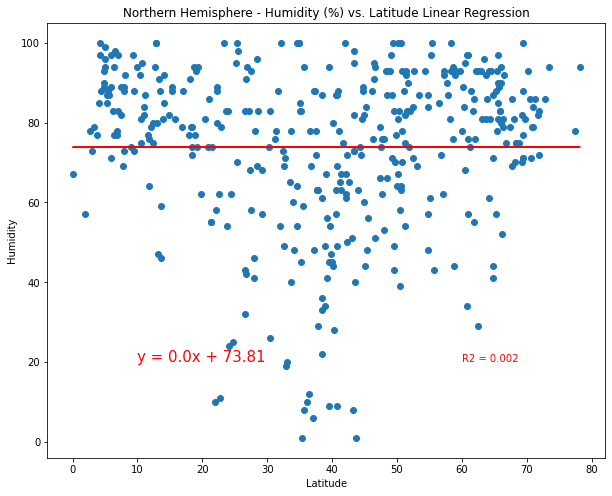

In [19]:
#Linear Regression -northern Hemisphere - Humidity vs. Latitude 
#establish source of information for northern hemisphere above and only extract for y values
y_valueshumid = north_df['Humidity']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuesnorth, y_valueshumid)

# Calculate the predictions for each value of x (# Rooms)
regression_values3 = x_valuesnorth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq3}")

#establish figure size
plt.figure(figsize=(10,8))

# Plot observations
plt.scatter(x_valuesnorth, y_valueshumid)

# Plot the regression line
plt.plot(x_valuesnorth, regression_values3, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")


# Add the linear equation to the plot
plt.annotate(line_eq3, (10, 20), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (60, 20), fontsize=10, color="red")

#save file
plt.savefig("Fig7NorthHemi&Humidity.png")

#display plat
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


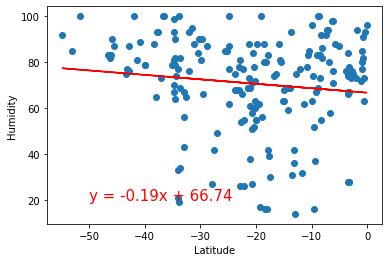

The line of best fit: y = 0.06x + 71.84
The r-value is: 0.04595119551828645


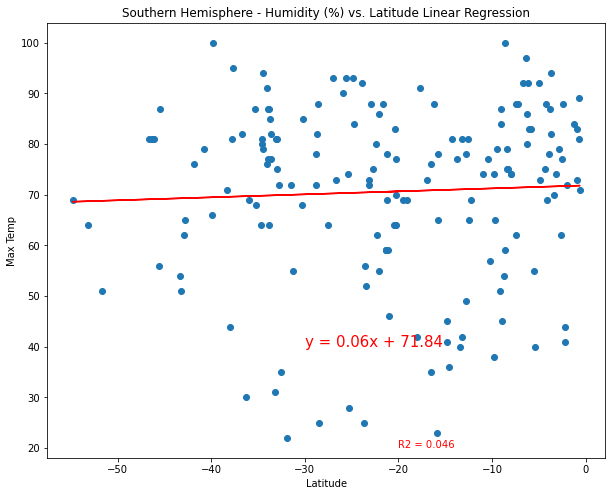

In [21]:
#Linear Regression -Southern Hemisphere - Humidity vs. Latitude 
#establish source of information for southern hemisphere and  extract specific columns for y values
y_valueshumid = south_df['Humidity']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuessouth, y_valueshumid)

# Calculate the predictions for each value of x (# Rooms)
regression_values4 = x_valuessouth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq4}")

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuessouth, y_valueshumid)

# Plot the regression line
plt.plot(x_valuessouth, regression_values4, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")


# Add the linear equation to the plot
plt.annotate(line_eq4, (-30, 40), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (-20, 20), fontsize=10, color="red")

plt.savefig("Fig8SouthHemi&Humidity.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


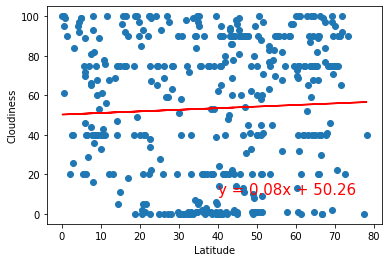

The line of best fit: y = 0.19x + 48.56
The r-value is: 0.10140995770475271


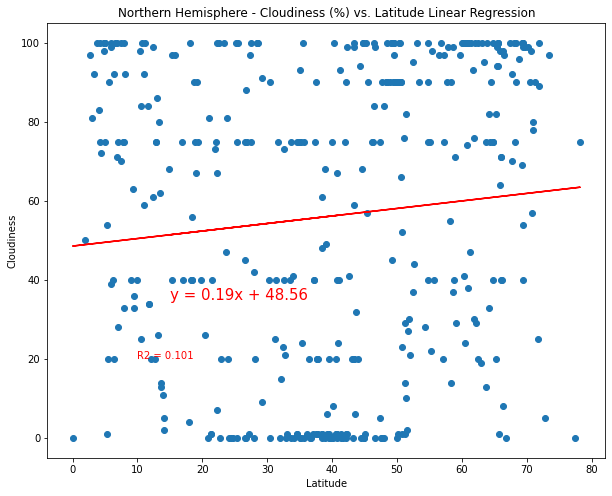

In [27]:
#Linear Regression -Northern Hemisphere - Cloudiness vs. Latitude 
#establish source of information for Northern hemisphere and extract specific columns  y values
y_valuescloud = north_df['Cloudiness']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuesnorth, y_valuescloud)

# Calculate the predictions for each value of x (# Rooms)
regression_values5 = x_valuesnorth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq5}")

#establish figure size
plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuesnorth, y_valuescloud)

# Plot the regression line
plt.plot(x_valuesnorth, regression_values5, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")


# Add the linear equation to the plot
plt.annotate(line_eq5, (15, 35), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (10, 20), fontsize=10, color="red")

#save figure
plt.savefig("Fig9NorthHemi&Cloudiness.png")

#display plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


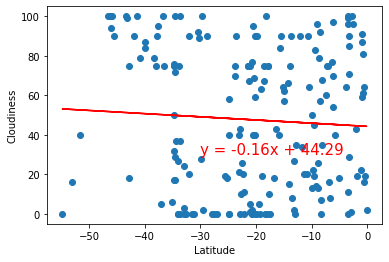

The line of best fit: y = 0.13x + 54.55
The r-value is: 0.05001628231271469


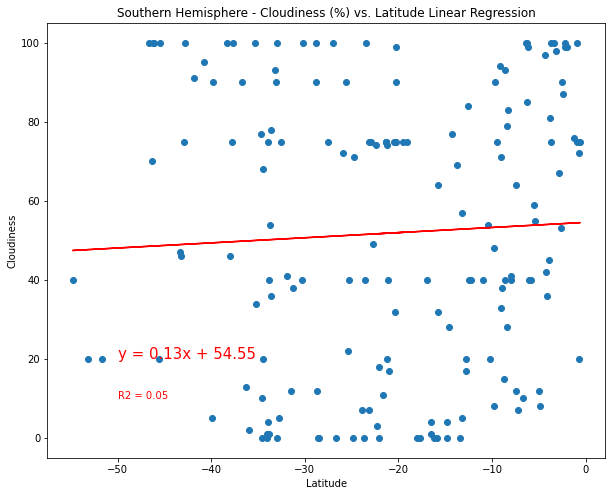

In [28]:
#Linear Regression -Southern Hemisphere - Cloudiness vs. Latitude 
#establish source of information for southern hemisphere and extract specific columns y values
y_valuescloud = south_df['Cloudiness']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuessouth, y_valuescloud)

# Calculate the predictions for each value of x (# Rooms)
regression_values6 = x_valuessouth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq6}")

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuessouth, y_valuescloud)

# Plot the regression line
plt.plot(x_valuessouth, regression_values6, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")

# Add the linear equation to the plot
plt.annotate(line_eq6, (-50, 20), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (-50, 10), fontsize=10, color="red")

#save the file
plt.savefig("Fig10SouthHemi&Cloudiness.png")

#display plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


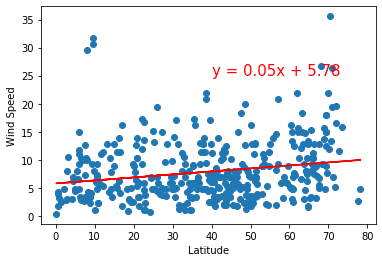

The line of best fit: y = 0.03x + 6.46
The r-value is: 0.12199683307058495


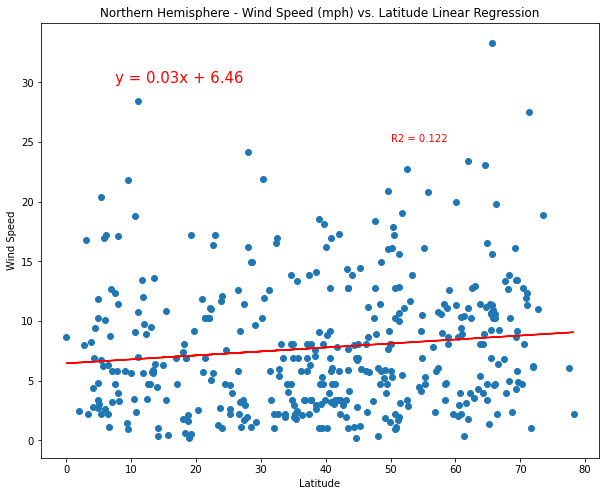

In [29]:
#Linear Regression -Northern Hemisphere - Wind Speed vs. Latitude 
#establish source of information for northern hemisphere and extract specific columns for y values

y_valueswind = north_df['Wind Speed']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuesnorth, y_valueswind)

# Calculate the predictions for each value of x (# Rooms)
regression_values7 = x_valuesnorth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq7}")

#establish figure size
plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuesnorth, y_valueswind)

# Plot the regression line
plt.plot(x_valuesnorth, regression_values7, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq7, (7.5, 30), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (50, 25), fontsize=10, color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")

#save figure
plt.savefig("Fig11NorthHemi&WindSpeed.png")

#display plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


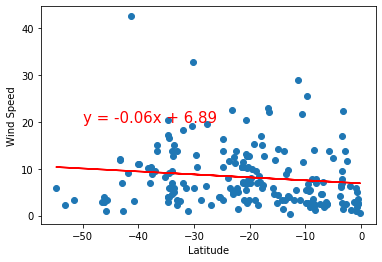

The line of best fit: y = -0.08x + 6.75
The r-value is: -0.21088973772049485


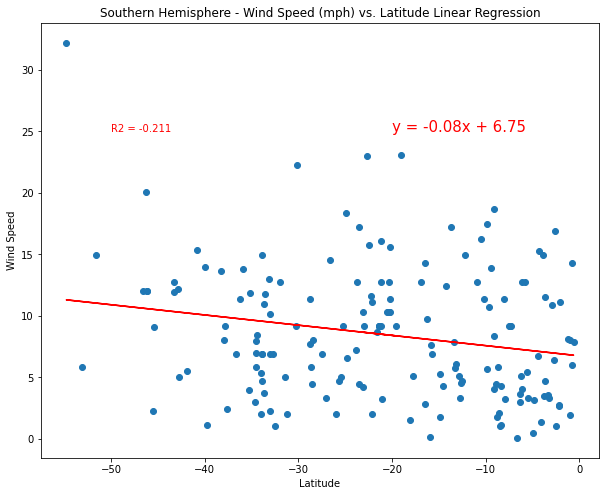

In [30]:
#Linear Regression -Southern Hemisphere - Wind Speed vs. Latitude 
#establish source of information for southern hemisphere and from that extract specific columns for x and y values
y_valueswind = south_df['Wind Speed']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuessouth, y_valueswind)

# Calculate the predictions for each value of x (# Rooms)
regression_values8 = x_valuessouth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq8}")

#figure size
plt.figure(figsize=(10,8))

# Plot observations
plt.scatter(x_valuessouth, y_valueswind)

# Plot the regression line
plt.plot(x_valuessouth, regression_values8, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq8, (-20, 25), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (-50, 25), fontsize=10, color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")

#save figure
plt.savefig("Fig12SouththHemi&WindSpeed.png")

#always do .show at the end
plt.show()